C:\Users\nikhi\AppData\Local\Temp\ipykernel_124508\1942738508.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['review'].str.len(), df_processed['cleaned_review'].str.len()],


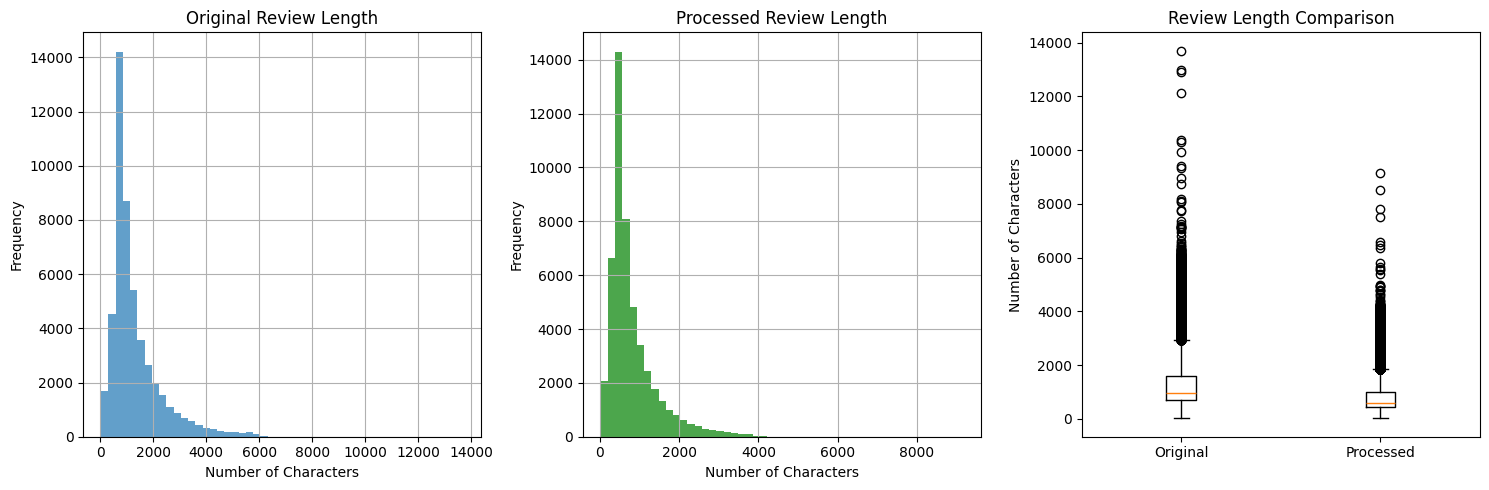

C:\Users\nikhi\AppData\Local\Temp\ipykernel_124508\1942738508.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['review'].str.split().map(len),


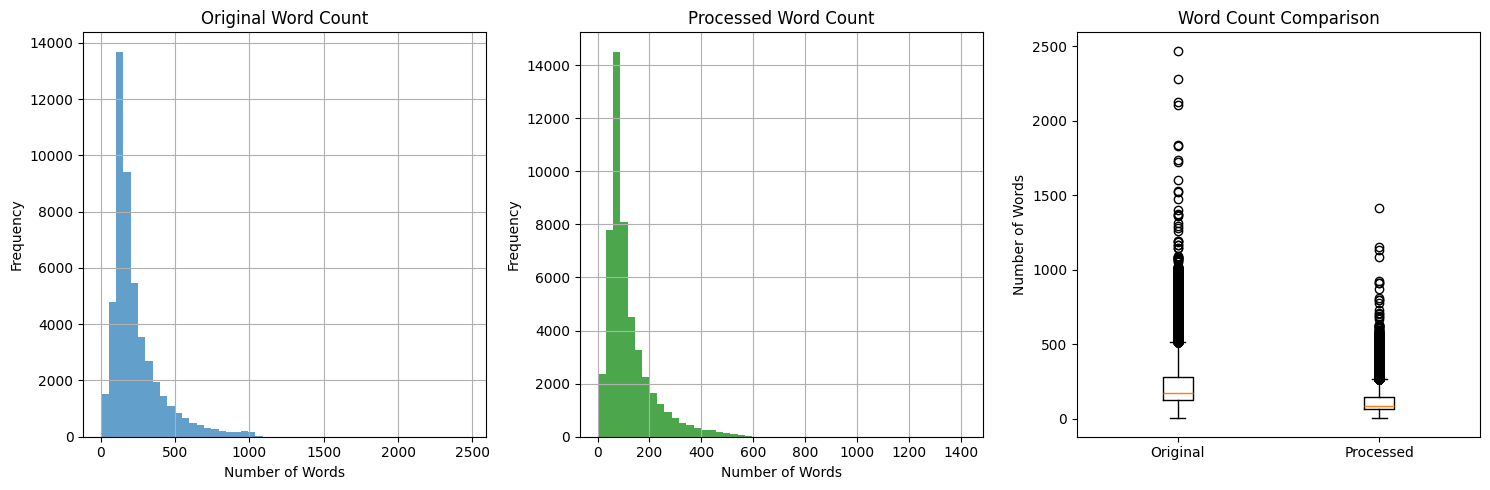

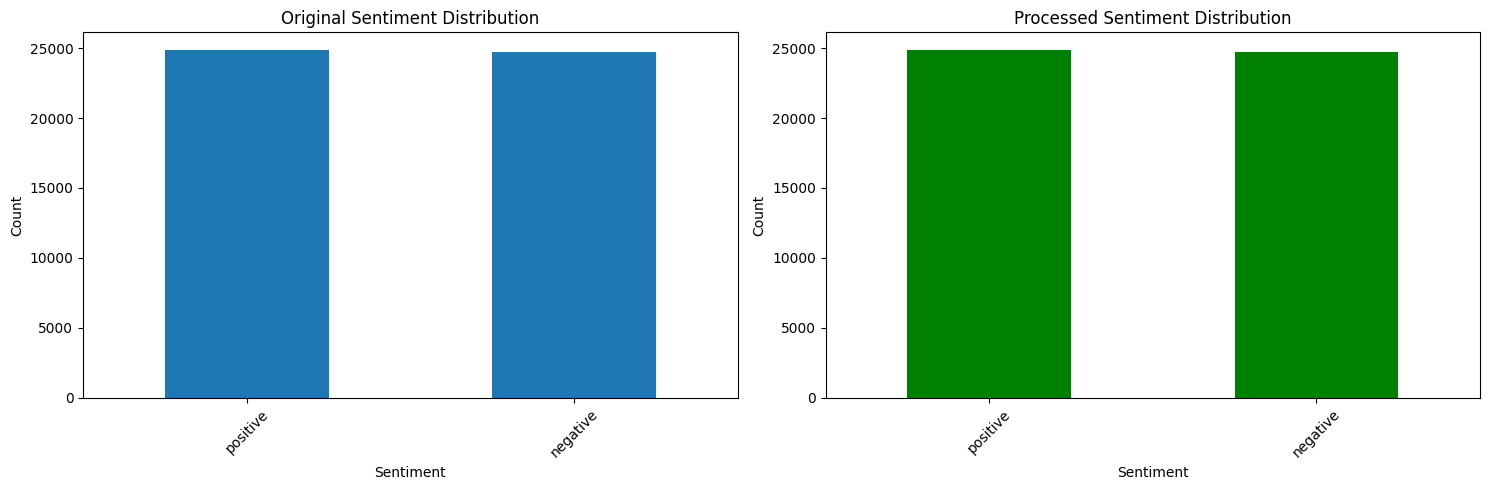

Preprocessing Impact Report:

Original Dataset:
Total Rows: 49582
Unique Sentiments: 2
Average Review Length: 1310.81 characters
Average Word Count: 231.36 words

Processed Dataset:
Total Rows: 49582
Unique Sentiments: 2
Average Review Length: 814.48 characters
Average Word Count: 118.22 words


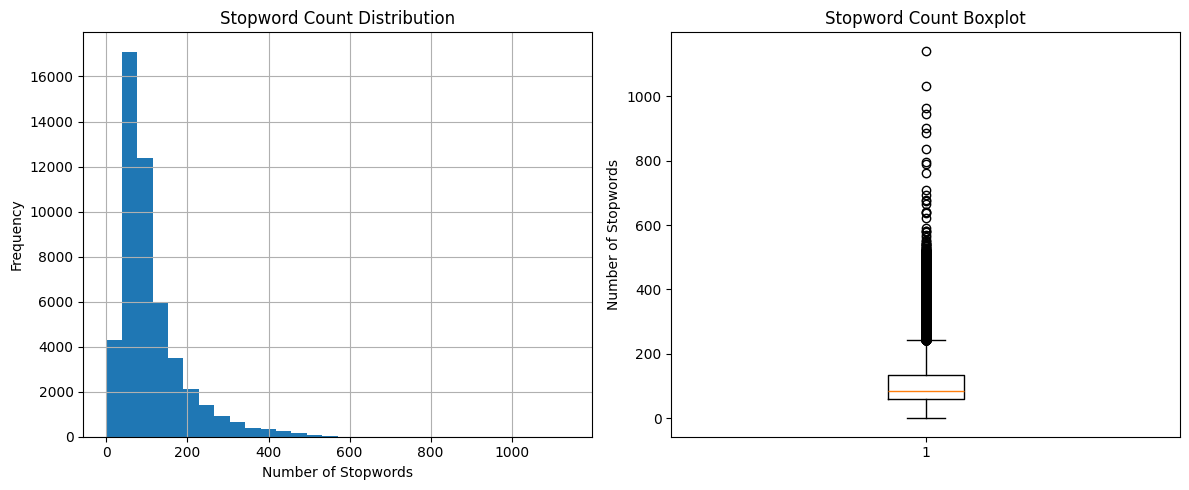


Stopword Analysis:
Average Stopwords per Review: 110.25
Maximum Stopwords in a Review: 1141
Minimum Stopwords in a Review: 0
Total Stopwords Removed: 5466426


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def advanced_text_cleaning(text):
    """
    Advanced text cleaning function for detailed preprocessing analysis
    
    Args:
        text (str): Input text to clean
    
    Returns:
        str: Cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

def visualize_preprocessing_impact(df):
    """
    Create comprehensive visualizations to show preprocessing impact
    
    Args:
        df (pd.DataFrame): DataFrame with text data
    """
    # Create a copy for preprocessing
    df_processed = df.copy()
    df_processed['cleaned_review'] = df_processed['review'].apply(advanced_text_cleaning)
    
    # 1. Text Length Comparison
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    df['review'].str.len().hist(bins=50, alpha=0.7)
    plt.title('Original Review Length')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    
    plt.subplot(132)
    df_processed['cleaned_review'].str.len().hist(bins=50, alpha=0.7, color='green')
    plt.title('Processed Review Length')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    
    plt.subplot(133)
    plt.boxplot([df['review'].str.len(), df_processed['cleaned_review'].str.len()], 
                labels=['Original', 'Processed'])
    plt.title('Review Length Comparison')
    plt.ylabel('Number of Characters')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Word Count Analysis
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    df['review'].str.split().map(len).hist(bins=50, alpha=0.7)
    plt.title('Original Word Count')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    plt.subplot(132)
    df_processed['cleaned_review'].str.split().map(len).hist(bins=50, alpha=0.7, color='green')
    plt.title('Processed Word Count')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    plt.subplot(133)
    plt.boxplot([df['review'].str.split().map(len), 
                 df_processed['cleaned_review'].str.split().map(len)], 
                labels=['Original', 'Processed'])
    plt.title('Word Count Comparison')
    plt.ylabel('Number of Words')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Sentiment Distribution Before and After
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    df['sentiment'].value_counts().plot(kind='bar')
    plt.title('Original Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(122)
    df_processed['sentiment'].value_counts().plot(kind='bar', color='green')
    plt.title('Processed Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Detailed Preprocessing Impact Report
    print("Preprocessing Impact Report:")
    print("\nOriginal Dataset:")
    print(f"Total Rows: {len(df)}")
    print(f"Unique Sentiments: {df['sentiment'].nunique()}")
    print(f"Average Review Length: {df['review'].str.len().mean():.2f} characters")
    print(f"Average Word Count: {df['review'].str.split().map(len).mean():.2f} words")
    
    print("\nProcessed Dataset:")
    print(f"Total Rows: {len(df_processed)}")
    print(f"Unique Sentiments: {df_processed['sentiment'].nunique()}")
    print(f"Average Review Length: {df_processed['cleaned_review'].str.len().mean():.2f} characters")
    print(f"Average Word Count: {df_processed['cleaned_review'].str.split().map(len).mean():.2f} words")

# Load the data
df = pd.read_csv("/Users/nikhi/Desktop/sentiment_analysis/IMDB_Dataset/IMDB_Dataset.csv", encoding='ISO-8859-1')
df = df.drop_duplicates().dropna()

# Visualize preprocessing impact
visualize_preprocessing_impact(df)

def stopword_analysis(df):
    """
    Analyze the impact of stopword removal
    
    Args:
        df (pd.DataFrame): DataFrame with text data
    """
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Function to count stopwords
    def count_stopwords(text):
        tokens = word_tokenize(text.lower())
        return sum(1 for word in tokens if word in stop_words)
    
    # Count stopwords in original reviews
    df['stopword_count'] = df['review'].apply(count_stopwords)
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    df['stopword_count'].hist(bins=30)
    plt.title('Stopword Count Distribution')
    plt.xlabel('Number of Stopwords')
    plt.ylabel('Frequency')
    
    plt.subplot(122)
    plt.boxplot(df['stopword_count'])
    plt.title('Stopword Count Boxplot')
    plt.ylabel('Number of Stopwords')
    
    plt.tight_layout()
    plt.show()
    
    # Stopword statistics
    print("\nStopword Analysis:")
    print(f"Average Stopwords per Review: {df['stopword_count'].mean():.2f}")
    print(f"Maximum Stopwords in a Review: {df['stopword_count'].max()}")
    print(f"Minimum Stopwords in a Review: {df['stopword_count'].min()}")
    print(f"Total Stopwords Removed: {df['stopword_count'].sum()}")

# Perform stopword analysis
stopword_analysis(df)

In [ ]:
kjhdkjfhajsdhkf